### Loading Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

### Show Sample Of Data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

### Show More Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.duplicated().any()

False

### Above cells' conclusion

- Columns datatype need some modifications
- Dataset has missing values
- Dataset has no complete duplicates
- we need to replace each symbole in `Embarked`column to equivalent name to avoid conflict

In [9]:
# set style of visualization

sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Cleaning

In [10]:
# add column Initial with zero value

# 1- create Initial clumn with nan value 
data["Initial"] = np.nan

# 2- fill column with Title from name column
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    
# 3- replace some value with other to avoid confoution

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                              ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                              inplace = True)

In [11]:
# add column Family_Size with zero value

data["Family_Size"] = np.nan

In [12]:
# add age_group column

data["age_group"] = np.nan

In [13]:
# replace symboles with equivalent name in Embarked column 

data["Embarked"].replace({"C" : "Cherbourg", "Q" : "Queenstown", "S" : "Southampton"}, inplace = True)

In [14]:
data.drop(columns = ["PassengerId", "Ticket", "Cabin"], inplace = True)
data.sample(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Family_Size,age_group
337,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,134.5000,Cherbourg,Miss,NaN,NaN
419,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,24.1500,Southampton,Miss,NaN,NaN
780,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,7.2292,Cherbourg,Miss,NaN,NaN


###  Discovering `Survived` column

In [15]:
# show unique value

data["Survived"].unique()

array([0, 1], dtype=int64)

In [16]:
# Survived are categorical column

data["Survived"].replace({0 : "NO", 1 : "Yes"},inplace = True)

In [17]:
# output value count of each unique value

data["Survived"].value_counts()

NO     549
Yes    342
Name: Survived, dtype: int64

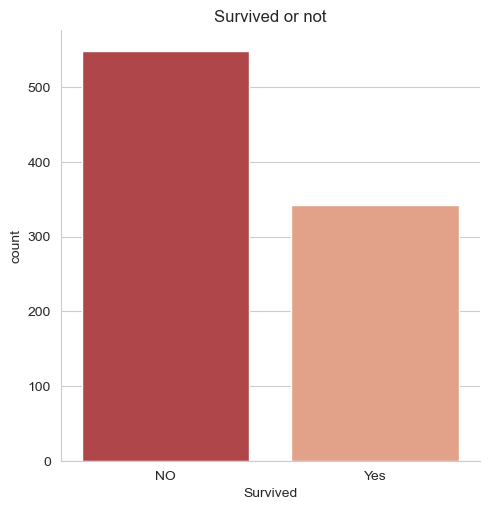

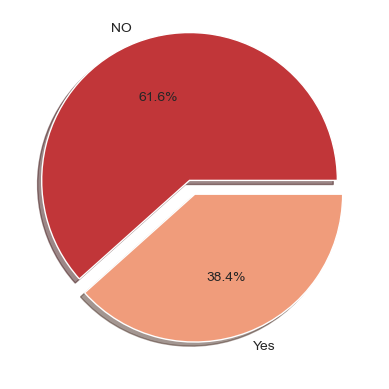

In [18]:
# visualized Survived column

# 1- create countplot
sns.catplot(x = "Survived", data = data, kind = "count")
plt.title("Survived or not")
plt.show()

# 2- create pie chere
values = data["Survived"].value_counts()
plt.pie(values, labels = ["NO", "Yes"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0])
plt.show()

- #### Most people not survived

###  Discovering `Pclass` column

In [19]:
# show unique value

data["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [20]:
# output value count of each unique value

data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

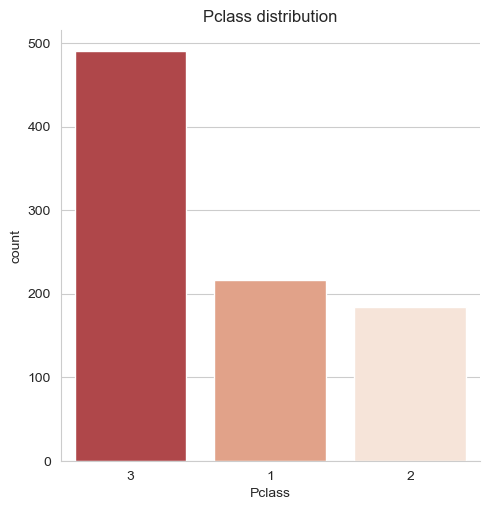

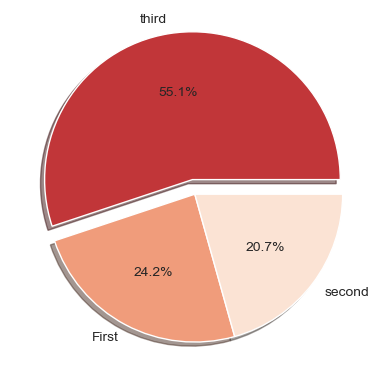

In [21]:
# visualized Pclass column

# 1- create countplot
sns.catplot(x = "Pclass", data = data, kind = "count", order = data.Pclass.value_counts().index)
plt.title("Pclass distribution")
plt.show()

# 2- create pie chere
values = data["Pclass"].value_counts()
plt.pie(values, labels = ["third", "First", "second"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most people placed in  3rd class

###  Discovering `Sex` column

In [22]:
# show unique value

data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [23]:
# output value count of each unique value

data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

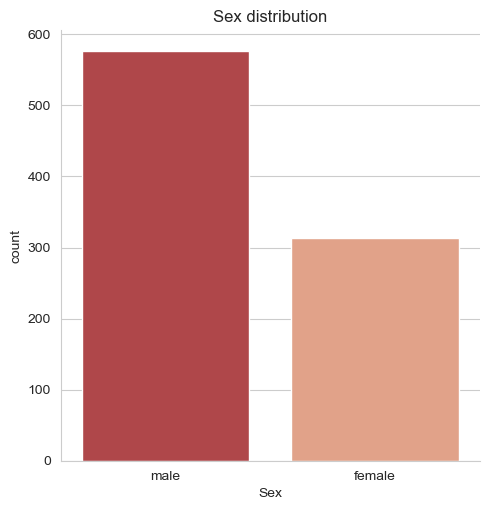

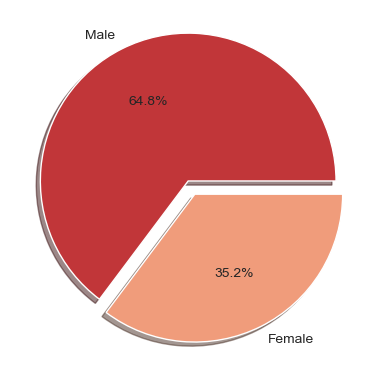

In [24]:
# visualized Sex column

# 1- create countplot
sns.catplot(x = "Sex", data = data, kind = "count",order = data["Sex"].value_counts().index)
plt.title("Sex distribution")
plt.show()

# 2- create pie chere
values = data["Sex"].value_counts()
plt.pie(values, labels = ["Male", "Female"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0])
plt.show()

- #### Most passenger are male

### Discovering `Age`  column



In [25]:
# output number of nan value 

data["Age"].isna().sum()

177

In [26]:
# fill nan value in age column

# 1- get unique value in initial column
titles = data["Initial"].unique()

# 2- grouped unique values 
group = data.groupby("Initial")

# 3- loop over titles list to get mean of values
for title in titles:
    data.loc[(data.Age.isna()) & (data.Initial == title),'Age'] = round(group.get_group(title)["Age"].mean())  

In [27]:
# make sure age column don't have nan value

data["Age"].isna().any()

False

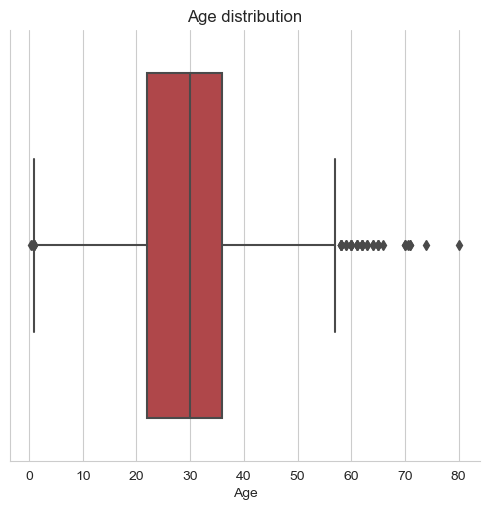

In [28]:
# show summary statistic

sns.catplot(x = "Age", data = data, kind = "box")
plt.title("Age distribution")
plt.show()

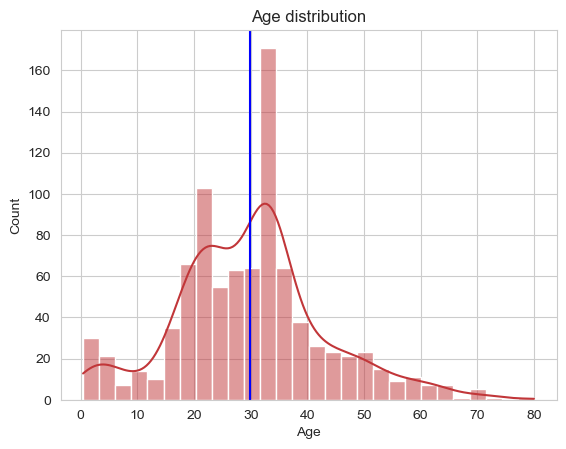

In [29]:
# visualized Age column

sns.histplot(x = "Age", data = data, kde = True)
plt.axvline(data.Age.mean(), color = "b")
plt.title("Age distribution")
plt.show()

- #### Most people were between 30 and 35

### Discovering `SibSp` and `Parch`  column



In [30]:
# show unique value of sibsp column 

data["SibSp"].unique()  

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [31]:
# output value count of sibsp column 

data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
# show unique value of parch column 

data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [33]:
# output value count of paech column 

data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

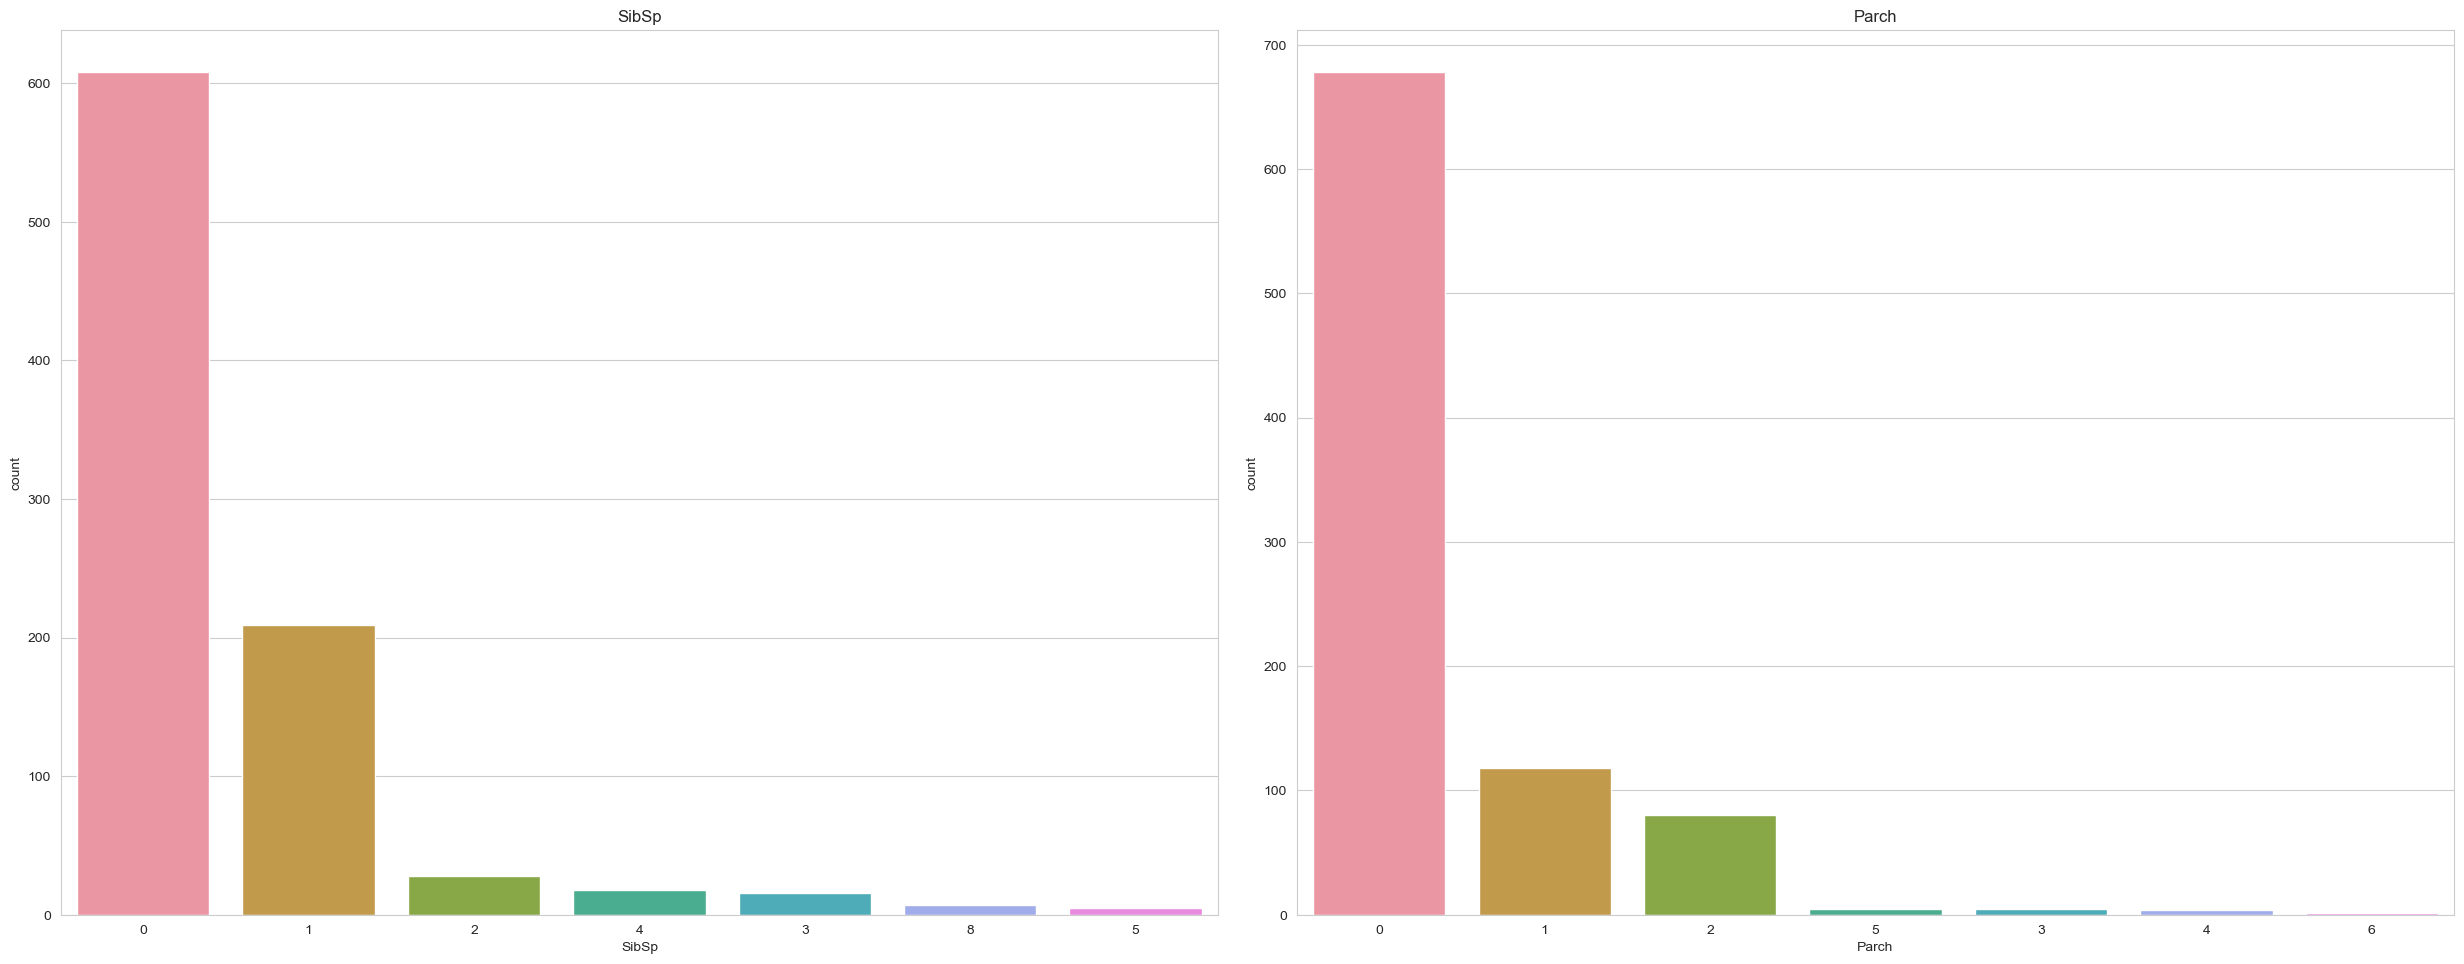

In [34]:
# # 1- create SibSp countplot
# sns.catplot(x = "SibSp", data = data, kind = "count",order = data["SibSp"].value_counts().index)
# plt.title("SibSp distribution")
# plt.show()

# # 2- create Parch countplot
# sns.catplot(x = "Parch", data = data, kind = "count",order = data["Parch"].value_counts().index)
# plt.title("Parch distribution")
# plt.show()

# create list of columns
columns = ["SibSp", "Parch"]

# 1- set figure size
plt.figure(figsize=(25, 10))

# 2- loop over objcolumns list to plot columns
for index, col in enumerate(columns):
    plt.subplot((len(columns) + 1) // 2, 2, index + 1)
    graph = sns.countplot(x = col, data = data, order = data[col].value_counts().index)
    plt.title(col) # set title to each plot
    
# 3- set layout between two plots
plt.tight_layout(pad = 2)
plt.show()

## From the above 

1- SibSp column 
- Most persons without Siblings/Spouses

2- Parch column
- Most persons without Parents/Children



### Discovering `Embarked` column

In [35]:
# show nuique value 

data["Embarked"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [36]:
# output number of nan value

data["Embarked"].isna().sum()

2

In [37]:
# fill nan value with mode 

data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)

In [38]:
data["Embarked"].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

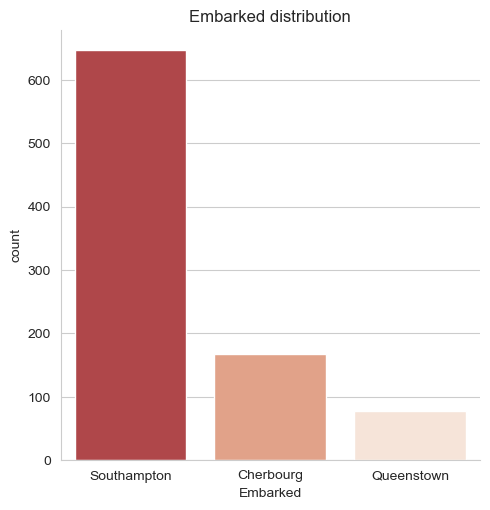

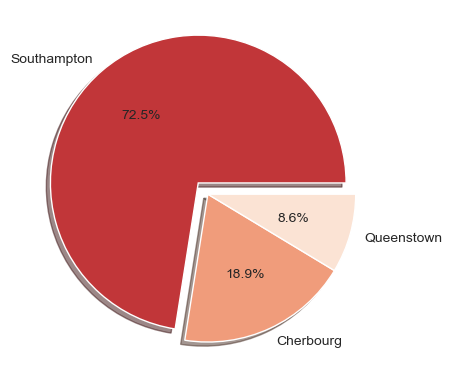

In [39]:
# visualized Embarked column

# 1- create countplot
sns.catplot(x = "Embarked", data = data, kind = "count",order = data["Embarked"].value_counts().index)
plt.title("Embarked distribution")
plt.show()

# 2- create pie chere
values = data["Embarked"].value_counts()
plt.pie(values, labels = ["Southampton", "Cherbourg", "Queenstown"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most persons Embark from Southampton port

### Discovering `Family_Size` column

In [40]:
# fill Family_Size with sum of Sibsp, Parch column

data["Family_Size"] = data["SibSp"] + data["Parch"]

In [41]:
# show unique value 

data["Family_Size"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [42]:
# output value count of each nuique value

data["Family_Size"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

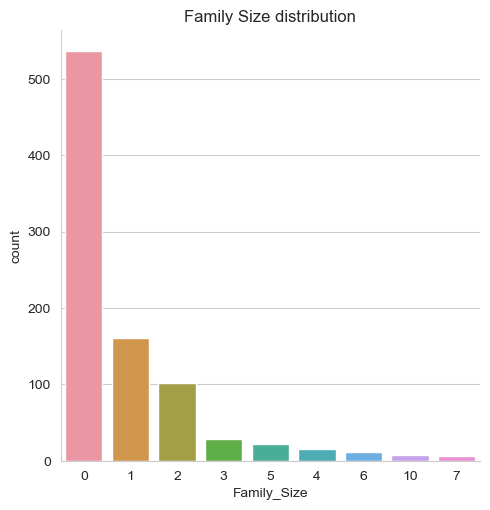

In [43]:
# 1- create countplot
sns.catplot(x = "Family_Size", data = data, kind = "count",order = data["Family_Size"].value_counts().index)
plt.title("Family Size distribution")
plt.show()


- #### Most passenger without family

In [44]:
# fill age_group columns

bins = [0,12,21,50,80]
labels = ["Child", "Young","Middle_aged" , "Old"]
data["age_group"] = pd.cut(data["Age"], bins = bins, labels = labels)

## More visualization

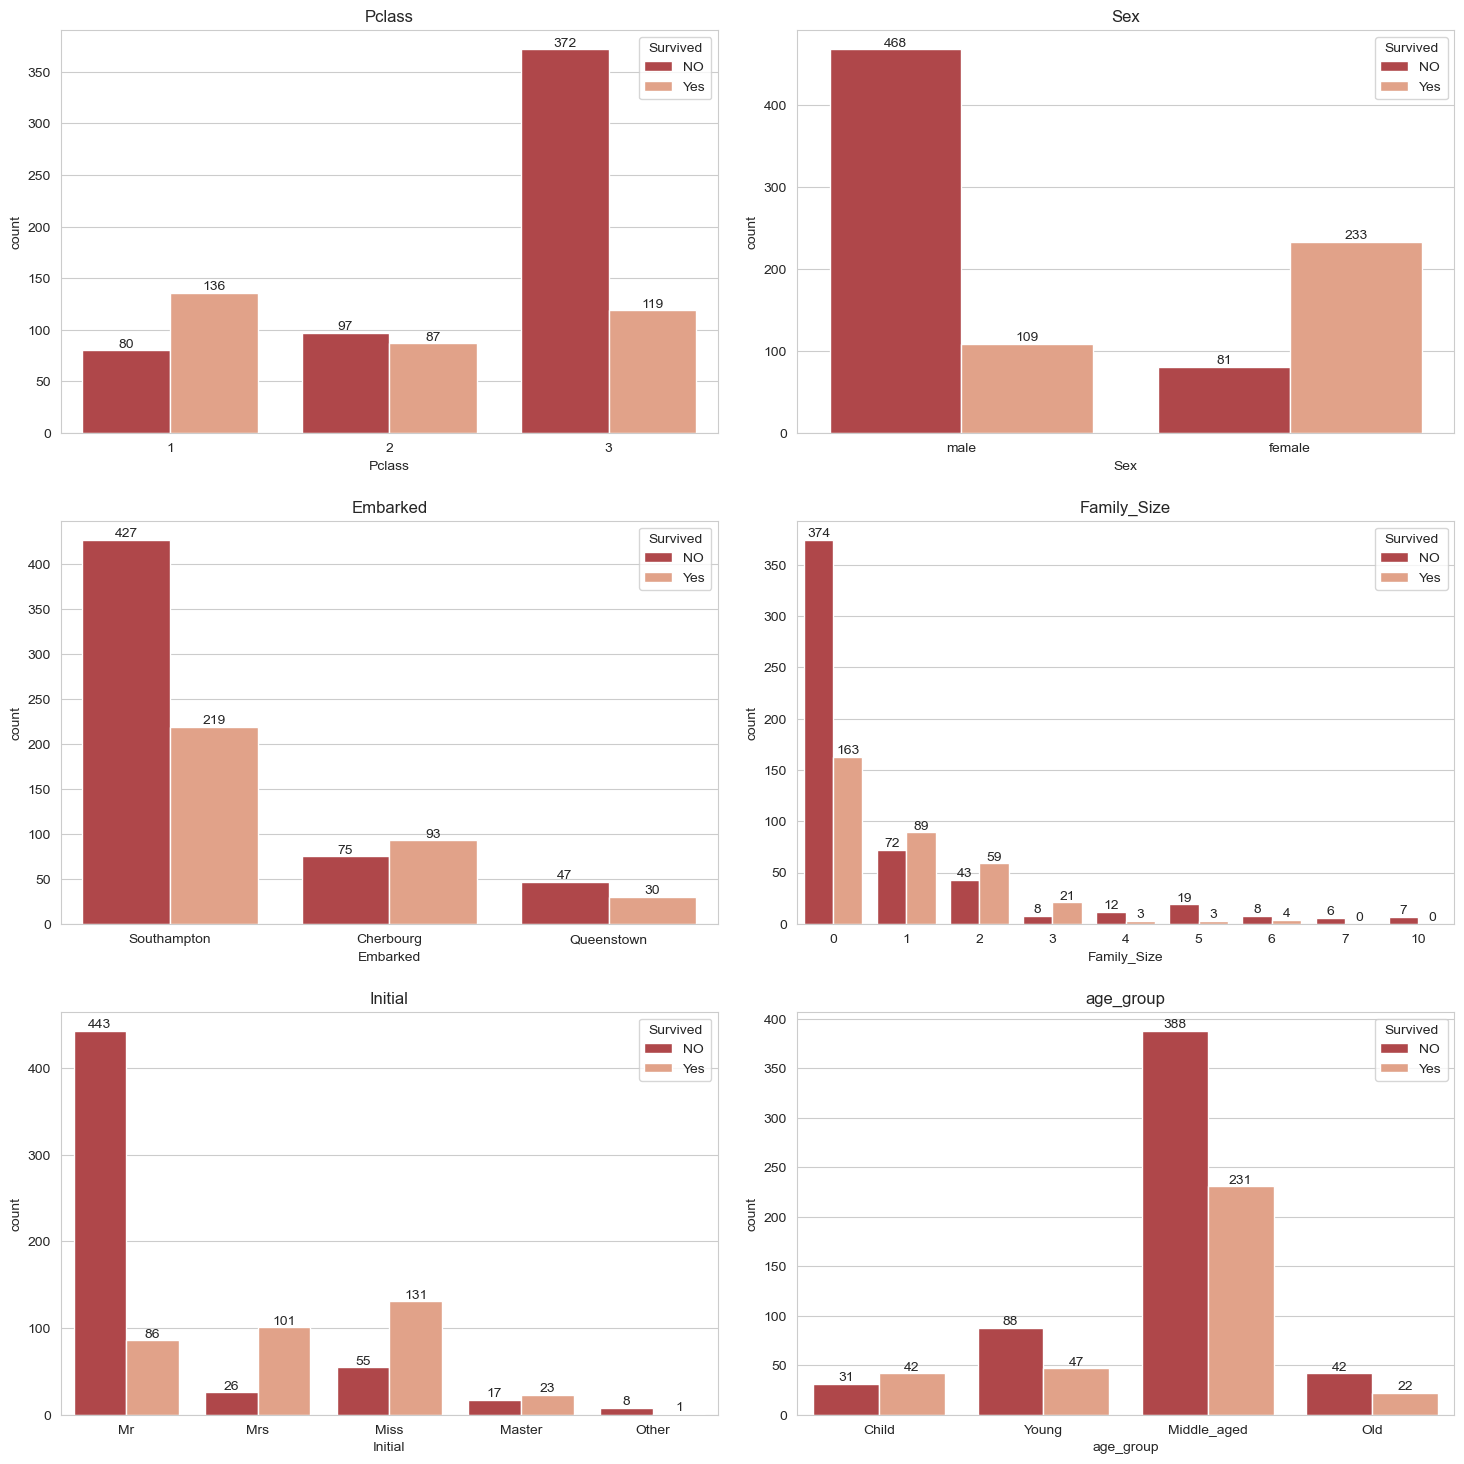

In [45]:
# create list of columns
columns = ["Pclass", "Sex", "Embarked", "Family_Size", "Initial", "age_group"]

# 1- set figure size
plt.figure(figsize=(15, 15))

# 2- loop over objcolumns list to plot columns
for index, col in enumerate(columns):
    plt.subplot((len(columns) + 1) // 2, 2, index + 1)
    graph = sns.countplot(x = col, data = data, hue = "Survived")
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.title(col) # set title to each plot
    
# 3- set layout between two plots
plt.tight_layout(pad = 2)
plt.show()

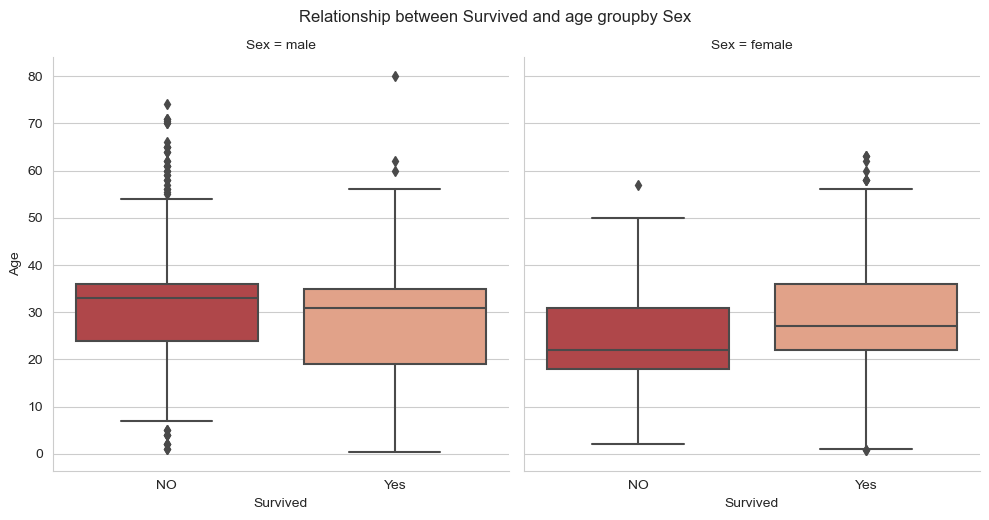

In [46]:
graph = sns.catplot(x = "Survived",y = "Age", col = "Sex", data = data, kind = "box")
graph.fig.suptitle("Relationship between Survived and age groupby Sex", y=1.03)
plt.show()

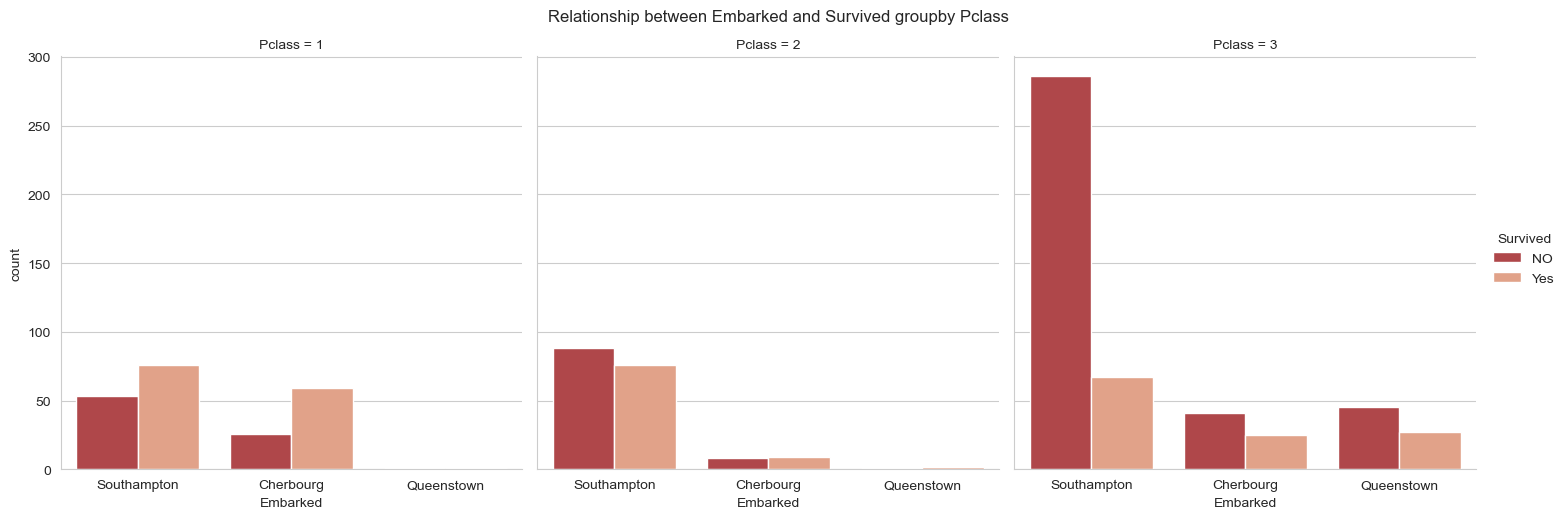

In [47]:
graph = sns.catplot(x = "Embarked", hue = "Survived", kind = "count", col = "Pclass", data = data)
graph.fig.suptitle("Relationship between Embarked and Survived groupby Pclass", y=1.03)
plt.show()

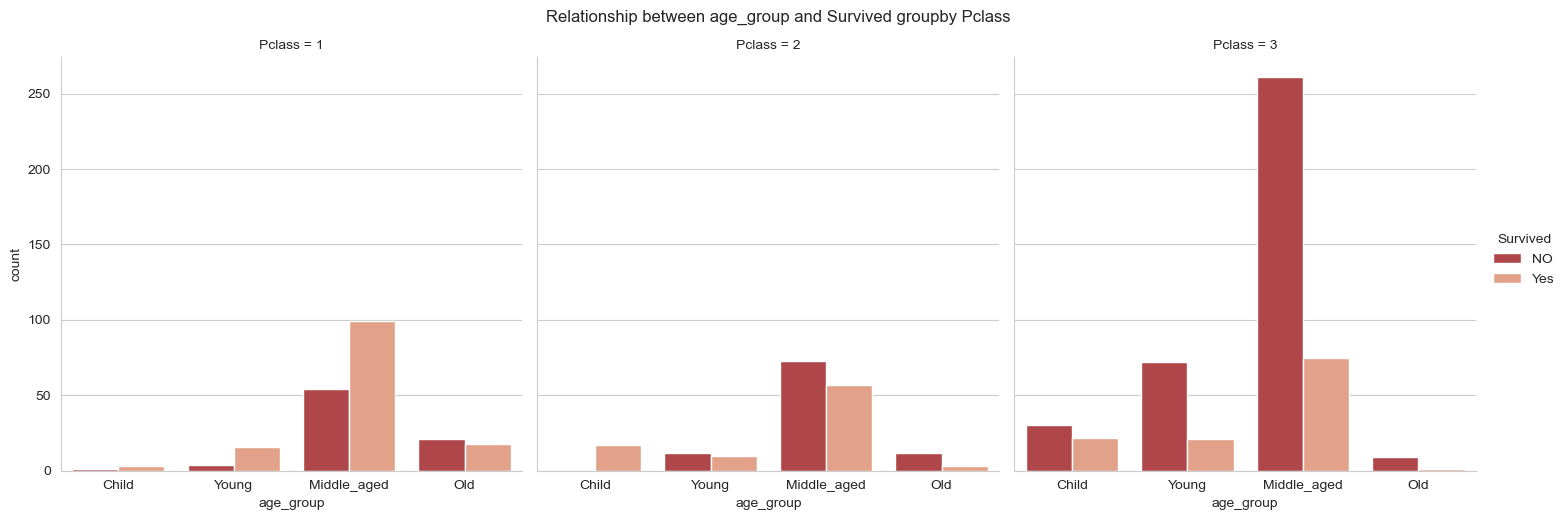

In [48]:
graph = sns.catplot(x = "age_group", hue = "Survived", kind = "count", col = "Pclass", data = data)
graph.fig.suptitle("Relationship between age_group and Survived groupby Pclass", y=1.03)
plt.show()

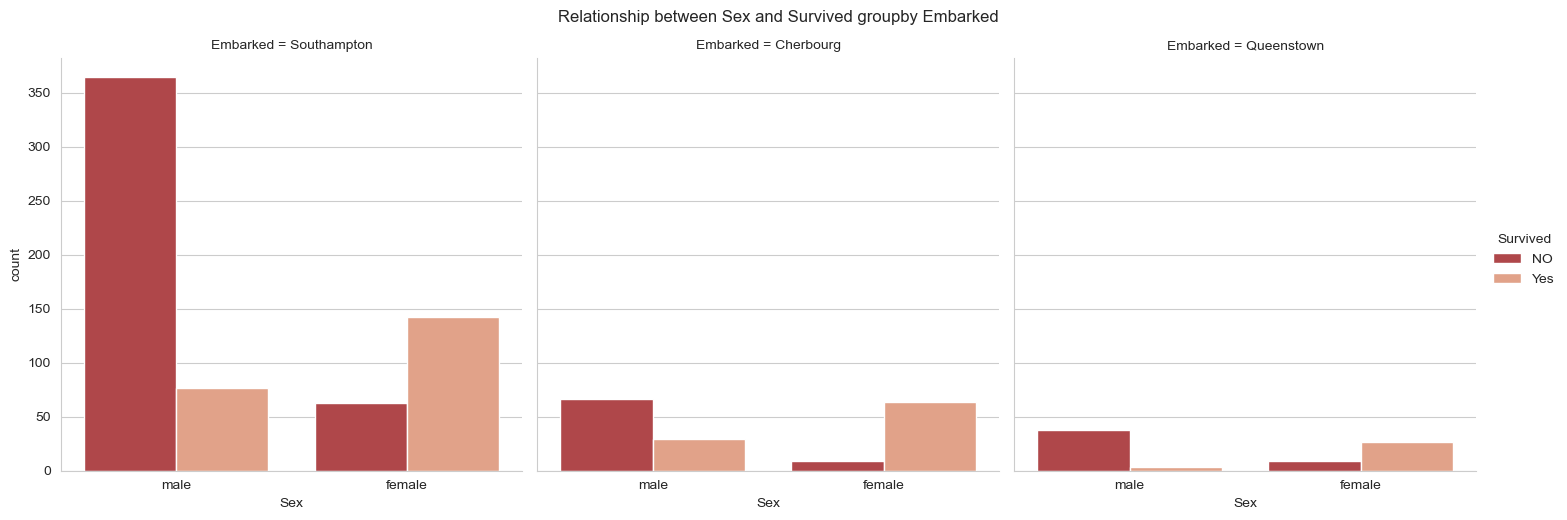

In [49]:
graph = sns.catplot(x = "Sex", hue = "Survived", kind = "count", col = "Embarked", data = data)
graph.fig.suptitle("Relationship between Sex and Survived groupby Embarked", y=1.03)
plt.show()

- Female passengers had much better survival rate than males
- Child most survived
- First class passengers are more likely to survive
- Large number of 25-50 year olds did not survive
- Therd class has most passengers, however most did not survive 
- Child  passengers in second class and therd class mostly survived
- Embarked Southampton where males and females had higher survival rate 